# 10.프로젝트: 인물모드를 구현하고 문제점과 솔루션 찾아내기
##### !. aiffel 가상환경 클라우드 플랫폼을 사용하여 jupyter notebook에서 작성되었습니다.


---

### (본문)

### STEP 0: 주요 라이브러리 import

In [1]:
import os
#urllib는 웹에서 데이터를 다운로드할 때 사용
import urllib
#cv2는 OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import cv2
import numpy as np
#pixellib는 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리 / 준비된 모델 사용
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

### Step 1. 인물모드 직접 해 보기

(1) 최소 3장 이상의 인물모드 사진을 제작.  
(2) 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있음(시맨틱 세그멘테이션 활용)  
(3) 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도.

(894, 736, 3)


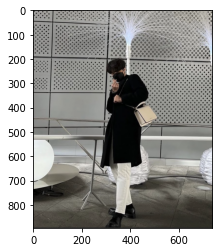

(406, 640, 3)


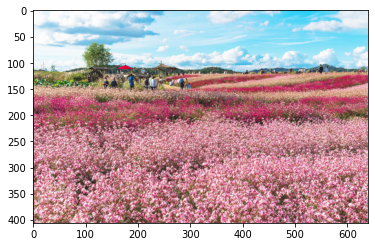

In [17]:
img_path = os.getenv('HOME')+'/aiffel/E_10/image.jpg'  
img_orig = cv2.imread(img_path) 
back_img_path=os.getenv('HOME')+'/aiffel/E_10/back1.jpg'  
back_img = cv2.imread(back_img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig , cv2.COLOR_BGR2RGB))
plt.show()


print(back_img.shape)
plt.imshow(cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB))
plt.show()

h,w,c=img_orig.shape

In [6]:
'''
2. 제로 패딩(zero padding)+resize() 후 이미지 저장 
    1. 이미지를 불러온다
    2. 배경이미지를 인물 이미지의 크기와 비슷한 크기로 리사이즈 시킨다(비율 유지)
    3. 이미지를 제로 패딩을 활용하여 배경과 크기를 맞춘다.
    4. 패딩된 이미지를 다시 저장시킨다.
'''
#h,w,c=img_orig.shape
# k=h*2
# r_back_img= cv2.resize(back_img, (k,h))

# print(img_orig.shape)
# plt.imshow(cv2.cvtColor(img_orig , cv2.COLOR_BGR2RGB))
# plt.show()

# 패딩으로 이미지 사이즈 변경
#k=((h*2)-w)//2
#r_img_orig =cv2.copyMakeBorder(img_orig,0,0,k,k,cv2.BORDER_CONSTANT,value=[0,0,0])

#A=h*2
#r_back_img= cv2.resize(back_img, (A,h))

#print(r_img_orig.shape)
#cv2.imwrite(img_path,r_img_orig)


#plt.imshow(cv2.cvtColor(r_img_orig , cv2.COLOR_BGR2RGB))
#plt.show()

#print(back_img.shape)
#plt.imshow(cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB))
#plt.show()


#print(r_back_img.shape)
#plt.imshow(cv2.cvtColor(r_back_img, cv2.COLOR_BGR2RGB))
#plt.show()


'\n2. 제로 패딩(zero padding)+resize() 후 이미지 저장 \n    1. 이미지를 불러온다\n    2. 배경이미지를 인물 이미지의 크기와 비슷한 크기로 리사이즈 시킨다(비율 유지)\n    3. 이미지를 제로 패딩을 활용하여 배경과 크기를 맞춘다.\n    4. 패딩된 이미지를 다시 저장시킨다.\n'

In [8]:
# 모델 다운받기
# 저장할 파일 이름을 결정.

model_dir = os.getenv('HOME')+'/aiffel/E_10'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/E_10/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f6037ff4400>)

다운로드한 모델을 이용해 PixelLib으로 사용할 세그멘테이션 모델을 생성.

In [9]:
# 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)


In [10]:
# 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

In [11]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

모델에서 나온 출력값 확인

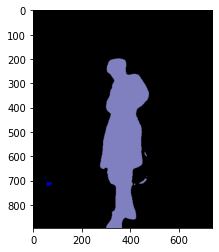

In [12]:
plt.imshow(output)
plt.show()

In [13]:
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [14]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


output: 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있음  
segbalues: class_ids와 masks가 담겨있음  
class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있음  

물체마다 output에 어떤 색상으로 나타나 있는지만 알아내기

In [15]:
# PixelLib에서 그대로 가져온 코드.
# 주목해야 할 것은 생상 코드 결과물.
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

PixelLib에 따르면 위 결과와 같은 색을 클래스마다 사용

색상알아보기

In [16]:
print(colormap[15])

[192 128 128]


In [17]:
seg_color = (128,128,192)


(894, 736)


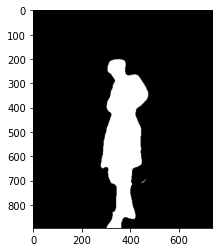

In [18]:
#seg_color로만 이루어진 마스크를 만들기
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됨
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

원래이미지와 겹쳐보기  
-> 얼마나 세그멘테이션이 잘되었는지 확인

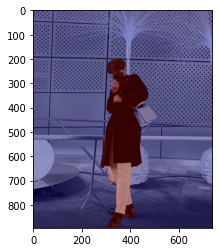

1788
894
(894, 1788, 3) (406, 640, 3) (894, 1788, 3)


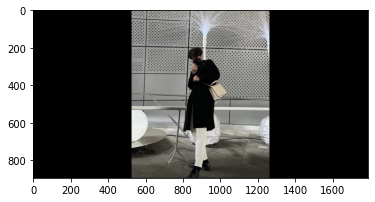

In [19]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿈.
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿈.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합침.
# 0.6과 0.4는 두 이미지를 섞는 비율.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

A=2*h
print(A)
r_back_img= cv2.resize(back_img,(A,h))
k=(A-w)//2
print(h)
r_img_orig =cv2.copyMakeBorder(img_orig,0,0,k,k,cv2.BORDER_CONSTANT,value=[0,0,0])
r_img_mask=cv2.copyMakeBorder(img_mask,0,0,k,k,cv2.BORDER_CONSTANT,value=[0,0,0])

print(r_img_orig.shape , back_img.shape,r_img_orig.shape)
plt.imshow(cv2.cvtColor(r_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 흐리게 만들기

#### blur() 함수: 배경을 흐리게 함.

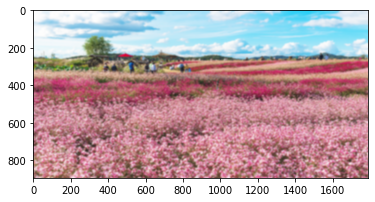

(894, 1788, 3)


In [20]:
# (10,10)은 blurring kernel size를 뜻함
img_orig_blur = cv2.blur(r_back_img, (10,10)) # 흐려지는 정도를 나타냄. 값이 커질수록 흐려짐
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

print(img_orig_blur.shape)


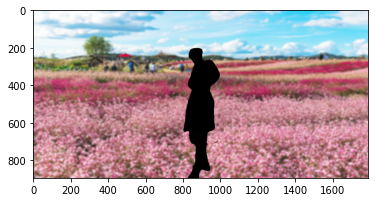

In [21]:
#흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(r_img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

bitwise_not 함수를 이용하면 이미지가 반전됨.  
원래 마스크 : 배경 0 사람 255  
[bitwise_not 연산 후]  
배경 255 사람 0  
=>0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됨. 결국 사람이 사라지게 됨.  

### 흐린 배경과 원본 영상 합성

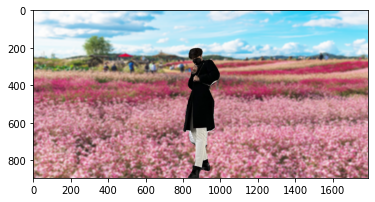

In [22]:
img_concat = np.where(img_mask_color==255, r_img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### Step 2. 사진에서 문제점 찾기


 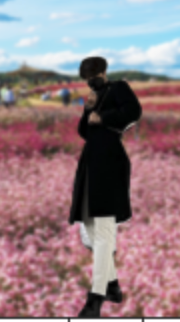
 사진에서 가방에 가려져 있던 신체부위가 사라져 허리가 잘록해짐.

### 지금까지의 과정을 함수로 만들어 인물모드 사진을 만들어내고 문제점 확인하기

#### 배경 합성 함수 blur_def

In [2]:
def blur_def(file, obj, back = None):
    # data
    img_path = os.getenv('HOME')+'/aiffel/E_10/' + file  
    img_orig = cv2.imread(img_path) 

    # model
    model_dir = os.getenv('HOME')+'/aiffel/E_10/'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)

    # 이미지 입력
    segvalues, output = model.segmentAsPascalvoc(img_path)


    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]

    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    seg_color = tuple(colormap[LABEL_NAMES.index(obj)][::-1])

    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됨
    seg_map = np.all(output==seg_color, axis=-1)
    # True과 False인 값을 각각 255과 0으로 바꿔줌.
    img_mask = seg_map.astype(np.uint8) * 255

    # 값이 커질 수록 blur가 진해짐
    
    plt.subplot(121)
    plt.title('Blur before')
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    
    img_orig_blur = cv2.blur(img_orig, (13,13))
    plt.subplot(122)
    plt.title('Blur after')
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    plt.subplot(121)
    plt.title('Extract')
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))

    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    plt.subplot(122)
    plt.title('Compose')
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # back이 있으면 
    if back:
        img_path = os.getenv('HOME')+'/aiffel/E_10/' + back
        img_back = cv2.imread(img_path) 
        img_resized = cv2.resize(img_orig, (img_back.shape[1], img_back.shape[0]))
        img_mask_resized = cv2.resize(img_mask_color, (img_back.shape[1], img_back.shape[0]))
        img_background_concat = np.where(img_mask_resized == 255, img_resized, img_back)
        plt.subplot(121)
        plt.title('Background')
        plt.imshow(cv2.cvtColor(img_background_concat, cv2.COLOR_BGR2RGB))
        plt.show()

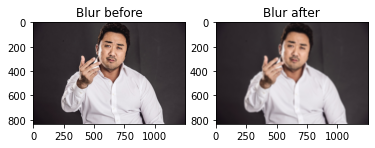

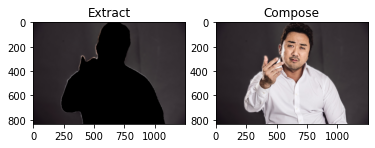

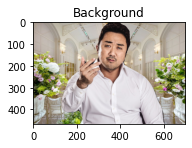

In [24]:
blur_def('image3.jpg', 'person', 'back3.jpg') # 사람 사진

사람과 배경이 명암이 구분이 잘되어 있었지만 반대로 아웃포커싱이 제대로 진행되지 않은 것 같고경계선이 깨진것을 확인할 수 있음

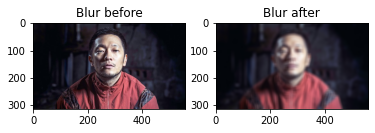

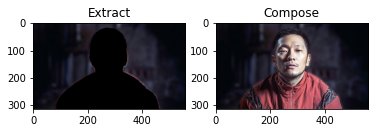

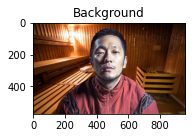

In [25]:
blur_def('image4.jpg', 'person', 'back4.jpg') # 명암구분이 어려운 사진

기존 사진의 머리쪽 부분이 명암차이가 크지 않았음에도 일단은 적절한 경계선을 가짐(깨지는 것은 그대로)

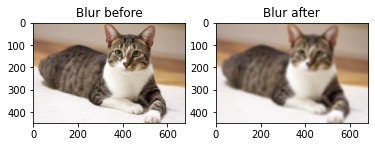

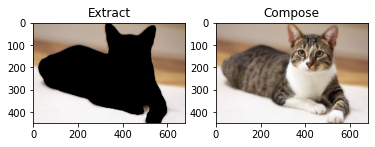

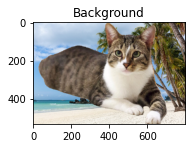

In [26]:
blur_def('image5.jpg', 'cat', 'back5.jpg') # 고양이

이미 사진에서 블러 처리가 되어있는부분은 출력물에서도 흐릿하게 유지된다. 뒷다리가 없는 형태임에도 불구하고 고양이 형태를 출력했다. 단 이 사진도 경계선이 깨지는게 아쉬움

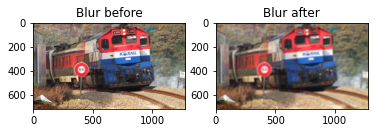

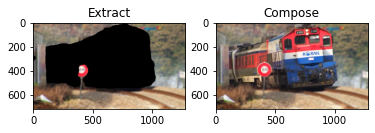

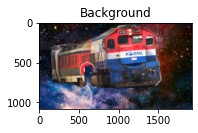

In [3]:
blur_def('image6.jpg', 'train', 'back6.jpg') # 철도

표지판에 가려진 열차 부분이 애매하게 출력되었으며 표지판도 완전히 지워내지 못함.

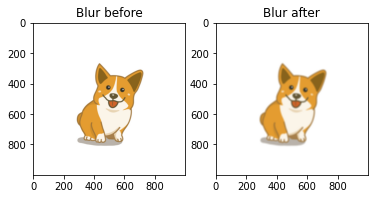

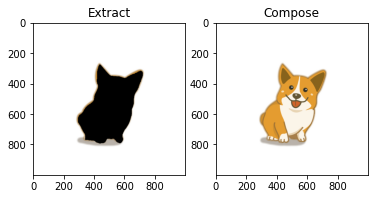

In [5]:
blur_def('image7.jpg', 'dog')# 강아지 캐릭터

실제 동물이 아닌 강아지 캐릭터도 의외로 잘 출력되었다.

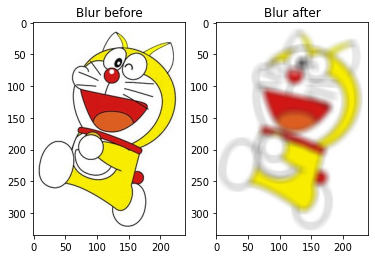

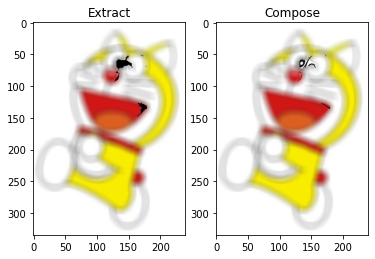

In [6]:
blur_def('image8.jpg', 'cat')# 고양이 캐릭터 도라에몽

고양이형 로봇인 도라에몽은 제대로 인식하지도 출력하지도 못했다.

### Step 3. 해결 방법을 제안해 보기


프로그래밍중 사진의 크기가 다른 에러로 인해 출력이 되지 않은 경우가 있었는데 Resizing 관련 설명을 찾아내 해결할 수 있었음.  

In [ ]:
'''
2. 제로 패딩(zero padding)+resize() 후 이미지 저장 
    1. 이미지를 불러온다
    2. 배경이미지를 인물 이미지의 크기와 비슷한 크기로 리사이즈 시킨다(비율 유지)
    3. 이미지를 제로 패딩을 활용하여 배경과 크기를 맞춘다.
    4. 패딩된 이미지를 다시 저장시킨다.
'''
#h,w,c=img_orig.shape
# k=h*2
# r_back_img= cv2.resize(back_img, (k,h))

# print(img_orig.shape)
# plt.imshow(cv2.cvtColor(img_orig , cv2.COLOR_BGR2RGB))
# plt.show()

# 패딩으로 이미지 사이즈 변경
#k=((h*2)-w)//2
#r_img_orig =cv2.copyMakeBorder(img_orig,0,0,k,k,cv2.BORDER_CONSTANT,value=[0,0,0])

#A=h*2
#r_back_img= cv2.resize(back_img, (A,h))

#print(r_img_orig.shape)
#cv2.imwrite(img_path,r_img_orig)


#plt.imshow(cv2.cvtColor(r_img_orig , cv2.COLOR_BGR2RGB))
#plt.show()

#print(back_img.shape)
#plt.imshow(cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB))
#plt.show()


#print(r_back_img.shape)
#plt.imshow(cv2.cvtColor(r_back_img, cv2.COLOR_BGR2RGB))
#plt.show()


세그멘테이션의 한계로 아웃포커싱이 완벽하게 구현되지 않음.  
이미지 초점의 정확도를 방법으로는 사진촬영때부터 IR(적외선)을 활용하여 물체로부터의 거리를 포착하고 센서로 반사광을 측정하는 LIDAR 센서를 활용하는 방법(현재 최신형 고가의 스마트폰들이 이 기술을 활용하여 인물사신모드를 사용중)이 있음.
그러나 이 프로젝트에서는 이미 찍혀진 사진등을 활용했기 때문에 적용할 수 없음.  

깊이영상(Depth Image)를 활용하여 Lidar 없이도 아웃포커싱의 정확도를 높인 경우가 있었음. (https://www.youtube.com/watch?v=jI1Qf7zMeIs&ab_channel=ComputerVisionFoundationVideos)

한계로 인해 대부분의 사진들이 경계선들이 깔끔하게 출력되지 않는 문제가 있었음. 검색해보니 언샤프 마스크 필터링, MODNet, watershed 알고리즘 등의 솔루션등이 있었음. 

인물사진의 중심이 특정 물건에 가려져 있거나 사라져 있는 경우의 솔루션을 찾기위해 검색하던중 포토샵의 내용인식채우기(Content-Aware Fill)라는 기술을 알게 됨.  (https://web.archive.org/web/20190404055934/https://research.adobe.com/project/content-aware-fill/)
이 기술을 적용할 수 있다면 해결가능할 것으로 생각됨.

사람은 도라에몽을 너구리가 아닌 고양이형 로봇이라고 인식하고 있지만 통상적으로 고양이로 볼수 없음에도 그것이 개인이 사전 배경 지식을 습득함으로써 인식이 진행되었음에 의한것일 때 결국 학습데이터에 도라에몽을 굉장히 많이 넣어야 한다는 솔루션밖에 없다는 결론을 내림.

---

### 루브릭.

|평가문항|비고|상세기준|비고 |
|:---|:---:|:---|---:|
| 1. 인물모드 사진을 성공적으로 제작하였다. | | 아웃포커싱 효과가 적용된 본인의 인물모드 사진과 고양이 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다. | |
| 2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다. | | 인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다. | |
| 3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다. | | 추가적인 depth 정보를 활용하여 semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 구체적으로 제시하였다. | |

---

### 회고록.

딥러닝을 사용하여 핸드폰 인물 사진 모드를 따라해보는 10번째 Exploration 프로젝트였다.  
실제로 사용되어지는 기술을 코드로 구현하는 것은 노력대비 굉장히 큰 만족감을 주었지만 반대로 적절한 솔루션을 찾아내는 것은 배로 어려움을 느꼈다.  
이번 프로젝트는 vscode와 colab 둘다 특정 라이브러리들이 실행이 되지 않아 부득이하게 aiffel 클라우드 환경에서 작업을 진행했다.    
클라우드 환경에서 자꾸 런타임이 초기화 되어 코드실행의 효율화를 위해 함수코드를 검색해 구현하여 프로젝트를 진행하게 되었는데 좋은 경험이었던 것 같다.  
오늘 찾아낸 문제점과 솔루션등을 직접 구현하여 모델의 성능을 끌어올려보는 시간을 가질 필요가 있음.

----

### Reference.

https://pixellib.readthedocs.io/en/latest/video_instance.html  
https://towardsdatascience.com/depth-prediction-autonomous-driving-18d05ff25dd6  



-----